<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/6.1-Return_and_understand_Histogram_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-visualization
!pip install qiskit-ibm-provider
!pip install qiskit-experiments
!pip install imgaug==0.2.5
!pip install pylatexenc

References:
* https://qiskit.org/documentation/apidoc/providers_basicaer.html
* https://youtu.be/V4CwN4rEtVQ (qasm_simulator)
* https://qiskit.org/documentation/stubs/qiskit.visualization.plot_histogram.html



In [ ]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf


#
# Loading IBM credentials
#
API_TOKEN_DIR="/content/drive/'My Drive'/'Colab Notebooks'/QC"
API_TOKEN_FILE="MY_API_TOKEN.txt"

#Mount the google drive first
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/'My Drive'/'Colab Notebooks'/QC
%cd $API_TOKEN_DIR

#Read the MY_API_TOKEN from file...
from qiskit_ibm_provider import IBMProvider
MY_API_TOKEN = ""
with open(API_TOKEN_FILE) as f:
  MY_API_TOKEN=f.readline()
IBMProvider.save_account(MY_API_TOKEN, overwrite=True)

[default]
circuit_drawer = mpl
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/QC


## Return and Understand Histogram Data of an Experiment
Here the qasm simulator is used


### qasm_simulator
Requires measures in the circuit and simulates the quantum hardware

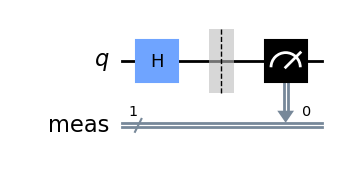

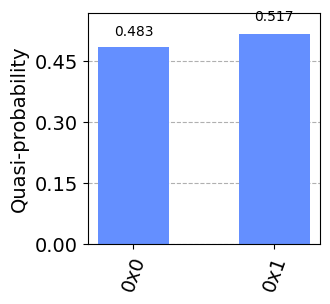

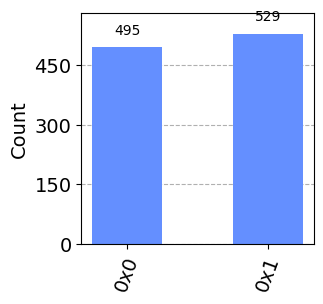

In [ ]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_distribution, plot_histogram

qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
display(qc.draw())

be = BasicAer.get_backend("qasm_simulator")
job = execute(qc, be)
result = job.result()

display(plot_distribution(result.data()['counts'], figsize=(3,3)))
display(plot_histogram(result.data()['counts'], figsize=(3,3)))